Streaming output truncated to the last 5000 lines.
Epoch 3/10, Mini-Batch Iteration 161, Loss: 0.4641
Epoch 3/10, Mini-Batch Iteration 162, Loss: 0.3913
Epoch 3/10, Mini-Batch Iteration 163, Loss: 0.1890
Epoch 3/10, Mini-Batch Iteration 164, Loss: 0.2192
Epoch 3/10, Mini-Batch Iteration 165, Loss: 0.3577
Epoch 3/10, Mini-Batch Iteration 166, Loss: 0.2370
Epoch 3/10, Mini-Batch Iteration 167, Loss: 0.3329
Epoch 3/10, Mini-Batch Iteration 168, Loss: 1.1079
Epoch 3/10, Mini-Batch Iteration 169, Loss: 0.4330
Epoch 3/10, Mini-Batch Iteration 170, Loss: 0.4400
Epoch 3/10, Mini-Batch Iteration 171, Loss: 0.1482
Epoch 3/10, Mini-Batch Iteration 172, Loss: 0.1811
Epoch 3/10, Mini-Batch Iteration 173, Loss: 0.3828
Epoch 3/10, Mini-Batch Iteration 174, Loss: 0.3810
Epoch 3/10, Mini-Batch Iteration 175, Loss: 0.2180
Epoch 3/10, Mini-Batch Iteration 176, Loss: 0.4279
Epoch 3/10, Mini-Batch Iteration 177, Loss: 0.3013
Epoch 3/10, Mini-Batch Iteration 178, Loss: 0.2527
Epoch 3/10, Mini-Batch Iteratio

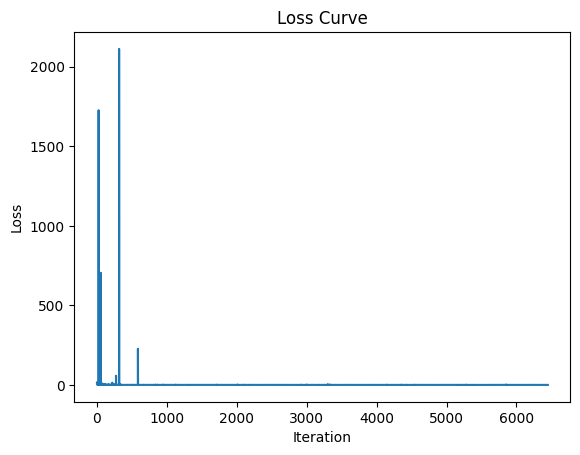

Estimated coefficients (intercept, slope): [ 2.06454979e+00  8.42074379e-01  1.16423565e-01 -2.53202755e-01
  3.81844805e-01 -1.25074137e-03 -4.63831737e-02 -8.41744927e-01
 -8.14742390e-01]


In [1]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = fetch_california_housing()
X = data.data
y = data.target.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_b = np.c_[np.ones((X.shape[0], 1)), X]

def stochastic_mini_batch_gradient_descent(X, y, learning_rate=0.01, epochs=10, batch_size=32):
    m, n = X.shape
    theta = np.random.randn(n, 1)

    losses = []

    for epoch in range(epochs):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]

            prediction = xi.dot(theta)
            error = prediction - yi
            gradient = xi.T.dot(error)
            theta = theta - learning_rate * gradient / batch_size

            loss = 0.5 * np.mean(error**2)
            losses.append(loss)

            print(f"Epoch {epoch+1}/{epochs}, Mini-Batch Iteration {i//batch_size+1}, Loss: {loss:.4f}")

    return theta, losses


theta, losses = stochastic_mini_batch_gradient_descent(X_b, y, learning_rate=0.01, epochs=10, batch_size=32)

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

print("Estimated coefficients (intercept, slope):", theta.ravel())
